## Time to get your hands dirty. Handwritten digits.

Sometimes you might want to apply multiple ML techniques. For example, just because you have labels in your training data doesn't mean that a regression algorithm will work very well.  So, you might want to start with a clustering or dimensional reduction algorithm first.

Here we're going to use the [MNIST database](https://en.wikipedia.org/wiki/MNIST_database). This contains a set of images with handwritten digts. It is one of the most widely used and best studied datasets in the whole of machine learning. It's part of the standard tests new tecniques need to face. 

### Tasks. Part 0.

1) First thing, grab a piece of paper and visually classify those 25 digits. We'll see if you're better or worse than a computer! 

**Spoiler alert: Davide's efficiency was ~80%, much worse than ML!**


2) Here is how you plot the images and the corresponding labels  (The one thing I'm not telling you of course is the random seed I used to select those above). After you've seen this ones, go back to your piece of paper and update your choices if you want. Keep track of both set of preditions. This is like supervised learning. 

### Tasks. Part 1. Unsupervised Learning: Dimensionality Reduction on Digits

We'd like to visualize our points within the 64-dimensional parameter space, but it's difficult to plot points in $N=64$ dimensions! So we need to reduce the dimensionality of the space


3) Use the unsupervised dimensionality reduction technique called **[`Isomap`](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html#sklearn.manifold.Isomap)**. Isomap is an embedding tecnique, which tries to understand if your $N$ dimensional datapoint live in a $N$ dimensional (with $N<M$) manyfold. Have a look at the Isomap documentation and reduce the MINST dataset.  Do some plots to visualize your results 

*Note*. Isomap is very recent. It was introduced by [Tenenbaum et al (2000)](https://www.science.org/doi/10.1126/science.290.5500.2319) ---a paper that has something like $1.5\times 10^4$ [citations](https://www.science.org/doi/full/10.1126/science.290.5500.2319).



### Tasks. Part 2. Supervised Learning: Classification on Digits

Now we want to classify the dataset. 

4) Split the dataset taking 80% of the images as tranining dataset and leaving the other 20% as a validation set. You need `sklearn.model_selection.train_test_split`.

5) Use a simple [`Logistic Regression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) which despite its name is a common classification algorithm. (I know, this is confusing!). Use the flag `solver='sag'`, the default solver had a bug, at least in my version.

6) Compute the accuracy (`sklearn.metrics.accuracy_score`) of your emulator. In this context, accuracy is simply the fraction of the digits that were correctly identified. Compute the accuracy on both the training and the validation set. Comment on the results.

7) The accuracy is a single number doesn't tell us ***where*** we've gone wrong. Plot the ***confusion matrix*** as we did above. What are the digits that are more challenging to identify, does it make sense?


There are many ways to improve this classifier, for example using a more sophisticated model, use cross validation, etc.  We'll get to those in the coming weeks.

-------
## My implementation

In [70]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import manifold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE

### Dataset

Load the dataset:

In [2]:
digits = datasets.load_digits()
print(digits.keys())
print('images shape: ', digits.images.shape)
print('data shape:', digits.data.shape)
print('target shape:', digits.target.shape)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
images shape:  (1797, 8, 8)
data shape: (1797, 64)
target shape: (1797,)


In [3]:
print(digits.data.shape)

# The images themselves
print(digits.images[0])

# The data for use in our algorithms
print(digits.data[0])

# The labels
print(digits.target)
print(digits.target[0])

(1797, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[0 1 2 ... 8 9 8]
0


Ok so the data is simply each pixel value within an $8\times 8$ grid.  For this analysis, we don't care about the $2$-D nature of the image, we can just treat it as an $8\times8=64$ dimensional array. So our data have $1797$ samples in $64$ dimensions.

Then each of the $1797$ ***images*** has a label.

Plot the images and the corresponding labels:

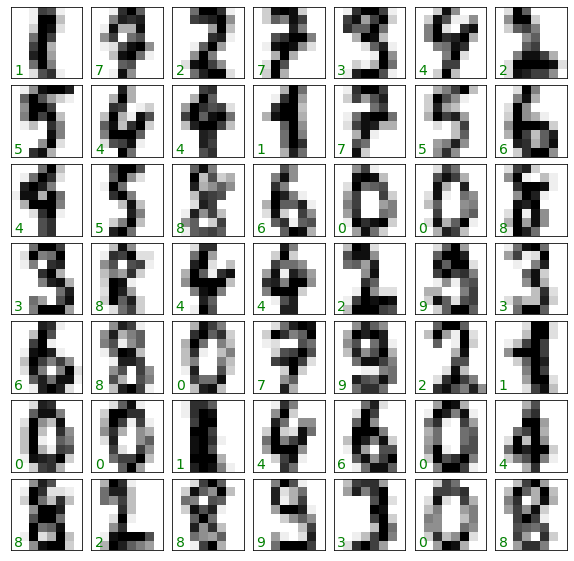

In [4]:
fig, axes = plt.subplots(7,7, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

np.random.seed(42)
mychoices = np.random.choice(digits.images.shape[0],100) # 100 numbers chosen between 0,1797

# shows the first 49 the images
for i, ax in enumerate(axes.flat):
    ax.imshow((digits.images[mychoices[i]]), 
              cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[mychoices[i]]),transform=ax.transAxes, color='green', fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

### Visualize data with ISOMAP

Now N=64. We pass to N=2 with isomap.

In [5]:
# isomap embedding in a 2D manifold
embedding = manifold.Isomap(n_components=2)   

# fit and transform data
reduced = embedding.fit_transform(digits.data)   
print('from', digits.data.shape, 'to',reduced.shape)

/usr/local/lib/python3.9/site-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.9/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


from (1797, 64) to (1797, 2)


Now we can visualize them:

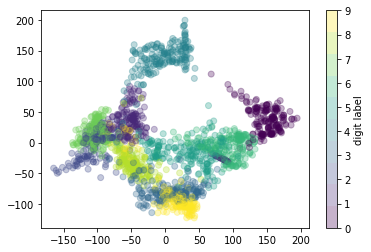

In [29]:
# quickly see reduced data
cmap = plt.cm.get_cmap('viridis', 10)
plt.scatter(reduced[:,0], reduced[:,1], alpha=0.3,
           c=digits.target, cmap=cmap)
plt.colorbar(label='digit label')

### Tasks. Part 2. Supervised Learning: Classification on Digits

Split data in two sets (train and test)

In [22]:
# data splitted in train and test set
xtrain, xtest, ytrain, ytest  = train_test_split(digits.data, digits.target, 
                                                 train_size=0.8, test_size=0.2, random_state=8)


print(xtrain.shape)    # data
print(xtest.shape)
print(ytrain.shape)    # labels
print(ytest.shape)   

(1437, 64)
(360, 64)
(1437,)
(360,)


Do classification with LogisticRegression

In [23]:
# estimator
clf = LogisticRegression(solver='sag')
clf.fit(xtrain, ytrain)

# predict labels of both trained and tested data
train_pred = clf.predict(xtrain)
test_pred = clf.predict(xtest)

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Model validation with accuracy and confusion matrix.

In [24]:
from sklearn import metrics

# accuracy
accuracy_train = metrics.accuracy_score(ytrain, train_pred)
accuracy_test = metrics.accuracy_score(ytest, test_pred)

#confusion matrix
cm_train = metrics.confusion_matrix(ytrain, train_pred)
cm_test = metrics.confusion_matrix(ytest, test_pred)


print('accuracy (train and test respecitively):',
      accuracy_train, accuracy_test)
print('\n confusion matrix, train data: \n',  cm_train)
print(' \n confusion matrix, test data: \n',  cm_test)

accuracy (train and test respecitively): 1.0 0.9666666666666667

 confusion matrix, train data: 
 [[144   0   0   0   0   0   0   0   0   0]
 [  0 145   0   0   0   0   0   0   0   0]
 [  0   0 145   0   0   0   0   0   0   0]
 [  0   0   0 145   0   0   0   0   0   0]
 [  0   0   0   0 155   0   0   0   0   0]
 [  0   0   0   0   0 133   0   0   0   0]
 [  0   0   0   0   0   0 144   0   0   0]
 [  0   0   0   0   0   0   0 139   0   0]
 [  0   0   0   0   0   0   0   0 141   0]
 [  0   0   0   0   0   0   0   0   0 146]]
 
 confusion matrix, test data: 
 [[34  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  1  0]
 [ 0  0 32  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  1  0  0  0  1]
 [ 0  0  0  0 25  0  0  0  1  0]
 [ 0  0  0  0  0 47  0  0  0  2]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  4  0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  1  0  0  1 32]]


### Visualize data with t-SNE

In [52]:
# Execute this cell
from matplotlib import offsetbox

#----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    #plt.figure(figsize=(10, 10))
    # ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]), 
                 color=plt.cm.nipy_spectral(digits.target[i]/9.))

    shown_images = np.array([[1., 1.]])  # just something big
    for i in range(digits.data.shape[0]):
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        if np.min(dist) < 4e-3:
            # don't show points that are too close
            continue
        shown_images = np.r_[shown_images, [X[i]]]
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(digits.images[i],
                                  cmap=plt.cm.gray_r), 
            X[i])
        ax2.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])

In [58]:
tsne = TSNE(n_components=2,learning_rate=200)
reduced = tsne.fit_transform(digits.data)

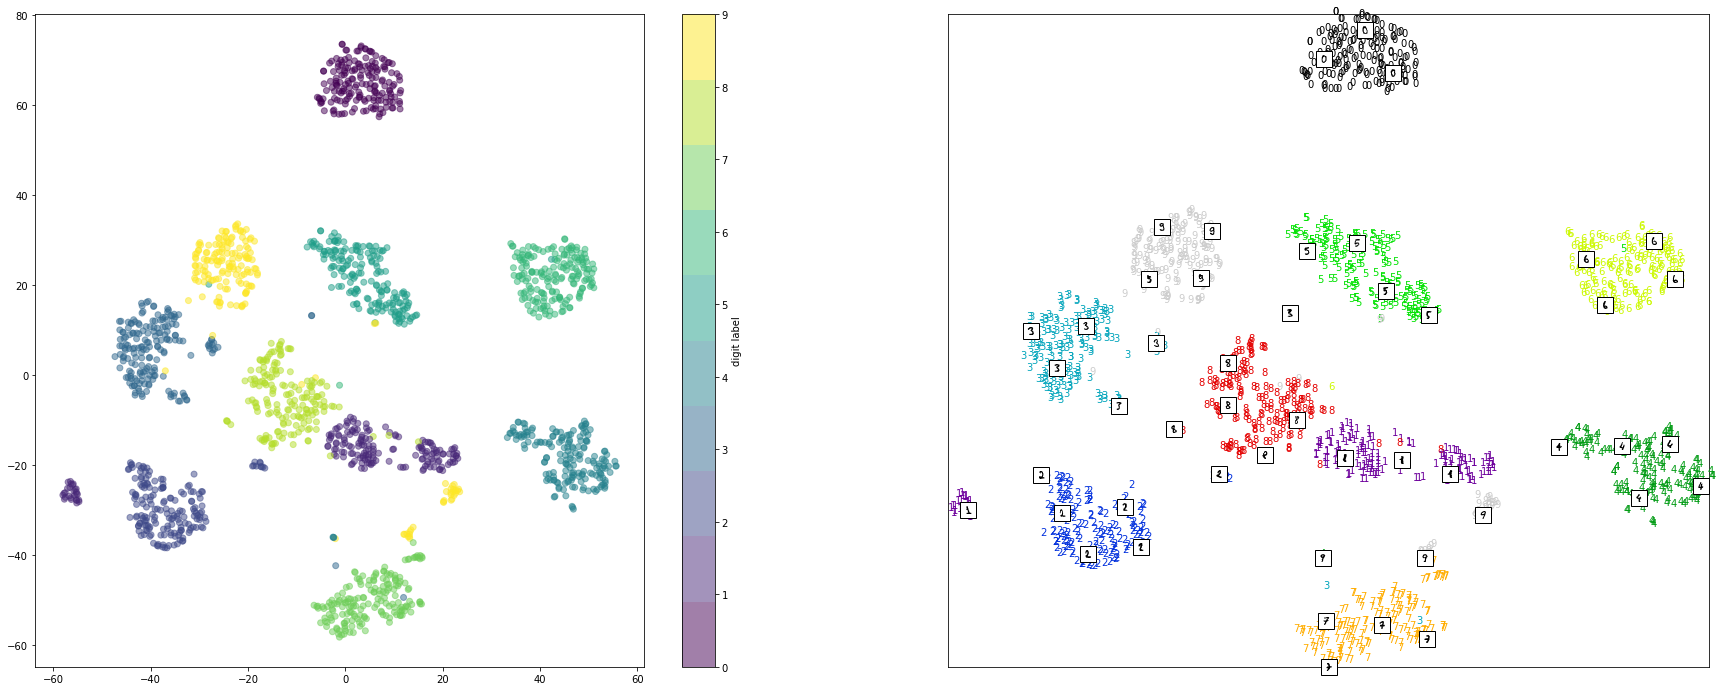

In [59]:
fig = plt.figure(figsize=(30,12))

ax1 = fig.add_subplot(121)
plt.scatter(reduced[:,0],reduced[:,1], alpha=0.5, c=digits.target, cmap=cmap)
plt.colorbar(label='digit label')

ax2 = fig.add_subplot(122)
plot_embedding(reduced)

#### Classify reduced data using kernel methods

In [60]:
xtrain, xtest, ytrain, ytest  = train_test_split(reduced, digits.target, 
                                                 train_size=0.8, test_size=0.2, random_state=8)

In [64]:
from sklearn.svm import SVC

clf = SVC(kernel='rbf',C=10)
clf.fit(xtrain, ytrain)
ypred = clf.predict(xtest)

In [69]:
accuracy = metrics.accuracy_score(ytest, ypred)
cm = metrics.confusion_matrix(ytest, ypred)

print('\n ACCURACY : \n ', accuracy, 
      '\n \n CONFUSION MATRIX :\n', cm)


 ACCURACY : 
  0.9944444444444445 
 
 CONFUSION MATRIX :
 [[34  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 32  0  0  0  0  0  0  0]
 [ 0  0  0 38  0  0  0  0  0  0]
 [ 0  0  0  0 26  0  0  0  0  0]
 [ 0  0  0  0  0 49  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  2  0  0  0  0  0  0 31  0]
 [ 0  0  0  0  0  0  0  0  0 34]]


Wow! The accuracy is so high!